In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = data[columns].corr()


"heatmap(\n    x=corr['x'],\n    y=corr['y'],\n    size=corr['value'].abs()\n)"

In [5]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [6]:
corr

,bore,stroke,compression-ratio,horsepower,city-mpg,price
bore,1.000000,-0.055390,0.001263,0.566936,-0.582027,0.543155
stroke,-0.055390,1.000000,0.187871,0.098267,-0.033956,0.082269
compression-ratio,0.001263,0.187871,1.000000,-0.214514,0.331425,0.071107
horsepower,0.566936,0.098267,-0.214514,1.000000,-0.822214,0.809575
city-mpg,-0.582027,-0.033956,0.331425,-0.822214,1.000000,-0.686571
price,0.543155,0.082269,0.071107,0.809575,-0.686571,1.000000


In [7]:
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y

In [8]:
corr

,index,variable,value
0,bore,bore,1.000000
1,stroke,bore,-0.055390
2,compression-ratio,bore,0.001263
3,horsepower,bore,0.566936
4,city-mpg,bore,-0.582027
5,price,bore,0.543155
6,bore,stroke,-0.055390
7,stroke,stroke,1.000000
8,compression-ratio,stroke,0.187871
9,horsepower,stroke,0.098267


In [9]:
corr.columns = ['x', 'y', 'value']

In [11]:
size=corr['value'].abs()
size

0     1.000000
1     0.055390
2     0.001263
3     0.566936
4     0.582027
5     0.543155
6     0.055390
7     1.000000
8     0.187871
9     0.098267
10    0.033956
11    0.082269
12    0.001263
13    0.187871
14    1.000000
15    0.214514
16    0.331425
17    0.071107
18    0.566936
19    0.098267
20    0.214514
21    1.000000
22    0.822214
23    0.809575
24    0.582027
25    0.033956
26    0.331425
27    0.822214
28    1.000000
29    0.686571
30    0.543155
31    0.082269
32    0.071107
33    0.809575
34    0.686571
35    1.000000
Name: value, dtype: float64

In [32]:
##only works for second image now cahnge patches to make it work for previous one
def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize=(9,10)) 
    # Mapping from column names to integer coordinates
    x_labels = [v for v in (x.unique())]
    y_labels = [v for v in (y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    size_scale = 450
    #ax.axvspan(0.5, 0.525, facecolor='black')
    #ax.axvspan(1.45, 1.475, facecolor='black')
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale,# Vector of square sizes, proportional to size parameter
        c= colors,
        cmap=matplotlib.colors.ListedColormap(['#984EA3','black', '#377EB8', '#377EB8', '#377EB8', '#377EB8', '#377EB8','#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A']),
        linewidth=0.5)
    ax.grid(False, 'major')
    ax.grid(False, 'minor')
    ax.set_xticks([t for t in ax.get_xticks()], minor=False)
    ax.set_yticks([t for t in ax.get_yticks()], minor=False)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    print([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    print([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    print([v for v in y_to_num.values()])
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=90, horizontalalignment='center', fontsize=14)
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels, fontsize=14)
    ax.add_patch(plt.Rectangle((-7.01,24.5),0.4, 1,facecolor='silver',clip_on=False,linewidth = 0))#statin
    ax.add_patch(plt.Rectangle((-7.01,17.5),0.4, 7,facecolor='#e8e288',clip_on=False,linewidth = 0))#others
    ax.add_patch(plt.Rectangle((-7.01,10.5),0.4, 7,facecolor='#ff8360',clip_on=False,linewidth = 0))#antithrom
    ax.add_patch(plt.Rectangle((-7.01,2.5),0.4, 8,facecolor='#7dce82',clip_on=False,linewidth = 0))#anticancer
    ax.add_patch(plt.Rectangle((-7.01,0.5),0.4, 2,facecolor='#3cdbd3',clip_on=False,linewidth = 0))#antibiotic
    ax.add_patch(plt.Rectangle((-7.01,-0.5),0.4, 1,facecolor='#004643',clip_on=False,linewidth = 0))#antihiv
    ax.add_patch(plt.Rectangle((-7.41,2.5),0.4, 7,facecolor='#70798C',clip_on=False,linewidth = 0))#antidep
    ax.add_patch(plt.Rectangle((-7.41,10.5),0.4, 1,facecolor='#70798C',clip_on=False,linewidth = 0))##antidep
    ax.add_patch(plt.Rectangle((-7.41,11.5),0.4, 2,facecolor='#A26769',clip_on=False,linewidth = 0))#antidiab
    ax.text((-7.01+0.3),0.5*(24.5+25.5), 'Statins', horizontalalignment='right', verticalalignment='center', fontsize=14, color='#3E1929',fontweight="bold")
    ax.text((-7.01+0.4),0.5*(17.5+24.5), 'Other', horizontalalignment='right', verticalalignment='center', fontsize=14, color='#3E1929',rotation='vertical',fontweight="bold")
    ax.text((-7.01+0.4),0.5*(10.5+17.5), 'Anti-thrombotic', horizontalalignment='right', verticalalignment='center', fontsize=14, color='#3E1929',rotation='vertical',fontweight="bold")
    ax.text((-7.01+0.4),0.5*(2.5+10.5), 'Anti-cancer', horizontalalignment='right', verticalalignment='center', fontsize=14, color='#3E1929',rotation='vertical',fontweight="bold")
    ax.text((-7.41+0.3),-0.15, 'Anti-HIV', horizontalalignment='right', verticalalignment='center', fontsize=14, color='#004643',fontweight="bold")
    ax.text((-7.41+0.4),2.0, 'Antibiotics', horizontalalignment='right', verticalalignment='center', fontsize=14, color='#3cdbd3',fontweight="bold")
    ax.text((-7.81+0.4),12.5, 'Antidiabetic', horizontalalignment='right', verticalalignment='center', fontsize=14, color='#A26769',rotation='vertical',fontweight="bold")
    ax.text((-7.81+0.4),6, 'Antidepressant', horizontalalignment='right', verticalalignment='center', fontsize=14, color='#70798C',rotation='vertical',fontweight="bold")
    fig.savefig('scatter.svg', format='svg', dpi=1200, bbox_inches='tight')
    fig.savefig('scatter.png', format='png', dpi=600, bbox_inches='tight')

In [255]:
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

NameError: name 'corr' is not defined

In [4]:
for line in open("scatter_hearmap.csv"):
    line=line.rstrip("\n")
    cols=line.split("\t")
    if line.startswith("D1"):
        print("key\t"+line)
        continue
    if cols[3].startswith("1"):
        key=cols[6]+" ("+cols[26]+")"
    else:
        key=cols[6]+" ("+cols[3]+")"
    print(key+"\t"+line)

key	D1	D2	D3	PGKB level	CHR	POS	DBSNP ID	REF	ALT	Fold	TIWI AF	1KG_ALL	1KG_AMR	1KG_SAS	1KG_EUR	1KG_EAS	1KG_AFR	gnomAD_g_ALL	gnomAD_g_AFR	gnomAD_g_AMR	gnomAD_g_ASJ	gnomAD_g_EAS	gnomAD_g_FIN	gnomAD_g_NFE	gnomAD_g_OTH	FDR_BH	GENE
rs3745274 (CYP2B6*9)	Anti-HIV			CYP2B6*9	19	41512841	rs3745274	G	T	1.33356562504949	0.421	0.315695	0.3732	0.3814	0.2356	0.2153	0.3744	0.2622	0.3682	0.2983	0.2517	0.1829	0.1919	0.2255	0.2373	0.001621	CYP2B6
rs1041983 (NAT2*13)	Antibiotics			NAT2*13	8	18257795	rs1041983	C	T	1.34133942682276	0.533	0.397364	0.2911	0.4284	0.3052	0.4395	0.4682	0.3574	0.4574	0.2914	0.3933	0.4277	0.2736	0.3173	0.3098	0.00003022	NAT2
rs1799931 (NAT2*7)	Antibiotics			NAT2*7	8	18258370	rs1799931	G	A	3.61041663431526	0.279	0.0772764	0.1124	0.0685	0.0229	0.1796	0.0287	0.0417	0.0356	0.1337	0.0199	0.159	0.0338	0.0303	0.0326	1.743E-018	NAT2
rs1058164 (CYP2D6)	Anticancer	Antidepressant		1A	22	42525132	rs1058164	G	C	2.43915821607251	0.978	0.400958	0.5274	0.4673	0.4563	0.2907	0.3275	0.4233	0.3528	0.

In [5]:
data=pd.read_csv("./scatter_heatmap1.csv",sep="\t", index_col=0, header=0)

In [6]:
data1=data.drop(['D1','D2','D3'],axis=1)

In [7]:
data1_t=data1.transpose()
data1_t = pd.melt(data1_t.reset_index(), id_vars='index')

In [8]:
x=data1_t["index"]
y=data1_t["variable"]
s=data1_t["value"]

In [4]:
colors=[int(i % 15) for i in range(len(x))]
heatmap(x,y,s)

NameError: name 'x' is not defined

In [85]:
data["D1"]

rs3745274 (CYP2B6*9)             Anti-HIV
rs1041983 (NAT2*13)           Antibiotics
rs1799931 (NAT2*7)            Antibiotics
rs1058164 (CYP2D6)             Anticancer
rs1135840 (CYP2D6)             Anticancer
rs4646903 (CYP1A1*2A)          Anticancer
rs1135824 (CYP2D6)             Anticancer
rs2228001 (XPC)                Anticancer
rs4986893 (CYP2C19*3)      Antithrombotic
rs3093105 (CYP4F2*2)       Antithrombotic
rs2108622 (CYP4F2*3)       Antithrombotic
rs1057910 (CYP2C9)         Antithrombotic
rs1057911 (CYP2C9)         Antithrombotic
rs7294 (VKORC1*3)          Antithrombotic
rs16947 (CYP2D6*34)                 Other
rs2070673 (CYP2E1*7)                Other
rs2740574 (CYP3A4*1B)               Other
rs1801265 (DPYD*9A)                 Other
rs1208 (NAT2*12)                    Other
rs2306283 (SLCO1B1*1B)              Other
rs34671512 (SLCO1B1*22)             Other
Name: D1, dtype: object

In [88]:
data["D2"]

rs3745274 (CYP2B6*9)                  NaN
rs1041983 (NAT2*13)                   NaN
rs1799931 (NAT2*7)                    NaN
rs1058164 (CYP2D6)         Antidepressant
rs1135840 (CYP2D6)         Antidepressant
rs4646903 (CYP1A1*2A)      Antidepressant
rs1135824 (CYP2D6)         Antidepressant
rs2228001 (XPC)                       NaN
rs4986893 (CYP2C19*3)      Antidepressant
rs3093105 (CYP4F2*2)       Antidepressant
rs2108622 (CYP4F2*3)       Antidepressant
rs1057910 (CYP2C9)           Sulfonamides
rs1057911 (CYP2C9)           Sulfonamides
rs7294 (VKORC1*3)                     NaN
rs16947 (CYP2D6*34)                   NaN
rs2070673 (CYP2E1*7)                  NaN
rs2740574 (CYP3A4*1B)                 NaN
rs1801265 (DPYD*9A)                   NaN
rs1208 (NAT2*12)                      NaN
rs2306283 (SLCO1B1*1B)                NaN
rs34671512 (SLCO1B1*22)               NaN
Name: D2, dtype: object

In [81]:
x_labels = [v for v in (x.unique())]
y_labels = [v for v in (y.unique())]
x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 

In [82]:
x_to_num

{'TIWI AF': 0,
 '1KG_ALL': 1,
 '1KG_AMR': 2,
 '1KG_SAS': 3,
 '1KG_EUR': 4,
 '1KG_EAS': 5,
 '1KG_AFR': 6,
 'gnomAD_g_ALL': 7,
 'gnomAD_g_AFR': 8,
 'gnomAD_g_AMR': 9,
 'gnomAD_g_ASJ': 10,
 'gnomAD_g_EAS': 11,
 'gnomAD_g_FIN': 12,
 'gnomAD_g_NFE': 13,
 'gnomAD_g_OTH': 14}

In [83]:
y_to_num

{'rs3745274 (CYP2B6*9)': 0,
 'rs1041983 (NAT2*13)': 1,
 'rs1799931 (NAT2*7)': 2,
 'rs1058164 (CYP2D6)': 3,
 'rs1135840 ()': 4,
 'rs4646903 (CYP1A1*2A)': 5,
 'rs1135824 (CYP2D6)': 6,
 'rs2228001 (XPC)': 7,
 'rs4986893 (CYP2C19*3)': 8,
 'rs3093105 (CYP4F2*2)': 9,
 'rs2108622 (CYP4F2*3)': 10,
 'rs1057910 (CYP2C9)': 11,
 'rs1057911 (CYP2C9)': 12,
 'rs7294 (VKORC1*3)': 13,
 'rs16947 (CYP2D6*34)': 14,
 'rs2070673 (CYP2E1*7)': 15,
 'rs2740574 (CYP3A4*1B)': 16,
 'rs1801265 (DPYD*9A)': 17,
 'rs1208 (NAT2*12)': 18,
 'rs2306283 (SLCO1B1*1B)': 19,
 'rs34671512 (SLCO1B1*22)': 20}

In [106]:
a=list(range(15))

In [119]:
matplotlib.colors.Colormap("Set2",3)

In [120]:
'#E41A1C',
'#377EB8',
'#4DAF4A',
'#984EA3',
'#FF7F00',
'#FFFF33',
'#A65628',
'#F781BF',
'#999999'

'#999999'

In [122]:
['#377EB8']*6

['#377EB8', '#377EB8', '#377EB8', '#377EB8', '#377EB8', '#377EB8']

In [124]:
['#4DAF4A']*7

['#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A', '#4DAF4A']

In [46]:
##try2
data=pd.read_csv("./scatter_heatmap_round2.csv",sep="\t", index_col=0,header=0)
data1=data.drop(['D1','D2','D3'],axis=1)
data1_t=data1.transpose()
data1_t = pd.melt(data1_t.reset_index(), id_vars='index')

In [47]:
x=data1_t["index"]
y=data1_t["ID"]
s=data1_t["value"]

In [48]:
data1_t["index"]

0        TIWI
1      Global
2         AMR
3         AFR
4         EUR
        ...  
385     ASJ_g
386     EAS_g
387     FIN_g
388     NFE_g
389     OTH_g
Name: index, Length: 390, dtype: object

[-0.5, 14.5]
[-0.5, 25.5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


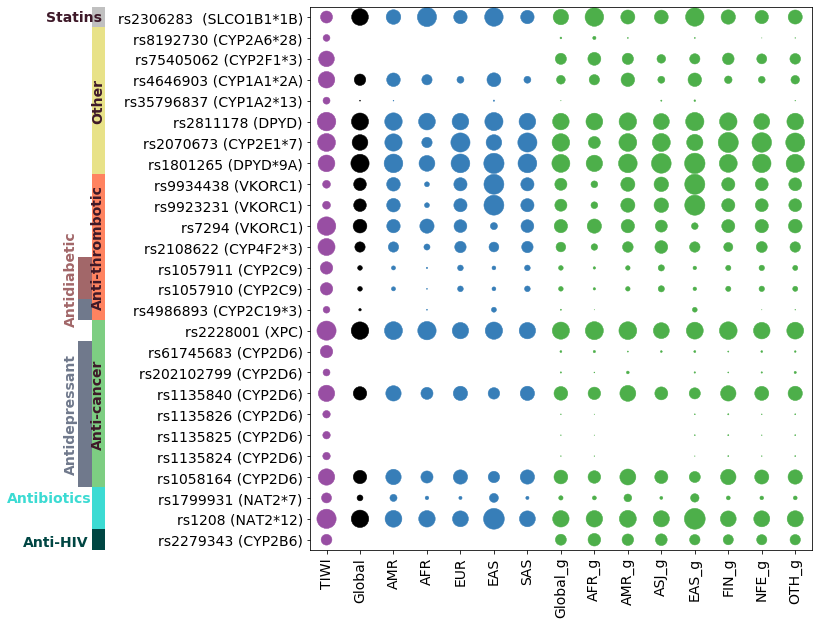

In [49]:
colors=[int(i % 15) for i in range(len(x))]
heatmap(x,y,s)

100 0.2222222222222222
200 0.4444444444444444
300 0.6666666666666666
400 0.8888888888888888


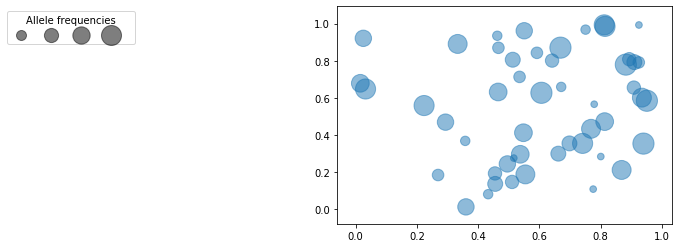

In [117]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
a2 = 450*np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
sc = plt.scatter(x, y, s=a2, alpha=0.5)
handles, labels = sc.legend_elements(prop="sizes",num=5)
nlabels=[]
for l in labels:
    test=l.split("{")
    acv=test[1].split("}")[0]
    val=int(test[1].split("}")[0])/450
    print(acv,val)
    newl=l.replace(acv,"")
    nlabels.append(newl)
plt.legend(handles,nlabels,bbox_to_anchor=(-1,1), loc='upper left', title="Allele frequencies",ncol=5,columnspacing=0)
plt.savefig("test.png", dpi=500, bbox_inches="tight")
plt.show()

In [75]:
for l in labels:
    test=l.split("{")
    acv=test[1].split("}")[0]
    val=int(test[1].split("}")[0])/450
    print(acv,val)

100 0.2222222222222222
200 0.4444444444444444
300 0.6666666666666666
400 0.8888888888888888


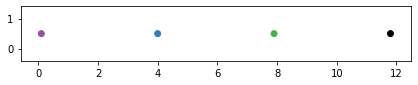

In [57]:
fig, ax = plt.subplots(figsize=(7,1))
ax.add_patch(plt.Circle((0.1, 0.5), 0.1, color='#984EA3'))
ax.add_patch(plt.Circle((4, 0.5), 0.1, color='#377EB8'))
ax.add_patch(plt.Circle((7.9, 0.5), 0.1, color='#4DAF4A'))
ax.add_patch(plt.Circle((11.8, 0.5), 0.1, color='black'))
plt.xlim(0,20)
ax.axis('equal')
plt.savefig("test1.png", dpi=500)
plt.show()